# Introduction to Machine Learning - PROJECT

Authors: Aino Liukkonen and Raúl Cruz-Oliver

In [23]:
import pandas as pd
# Documentation
# https://pandas.pydata.org/docs

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from datetime import datetime, date, time

In [11]:
# Our respective DATA folder paths
# data_folder = r'C:\Users\lenovo\Desktop\S7-DE\Introduction to Machine Learning\machine_learning_project\DATA'
data_folder = r'C:\Users\ainol\OneDrive\Tiedostot\TutaJaOhtu\Machine_Learning\course_project\DATA'

# Import Data
test = pd.read_excel(data_folder + r'\test.xlsx')
#this is only my path, add yours as a comment

print(test)


    Age  Children
0     5         0
1    25         0
2    55         1
3    35         1
4    12         0
5    75         1
6    65         1
7    21         0
8    92         1
9    37         1
10   49         1
11    9         0
12   27         0
13   68         1
14   38         1
15   57         1
16   56         1
17   23         0
18   18         0


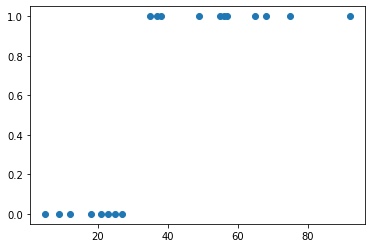

In [12]:
# Data visualization
# from data to vector
x = test["Age"].to_numpy()
y = test["Children"].to_numpy()

plt.scatter(x, y)

In [14]:
k = 1   #number of predictors, remember theta_0 is for the bias since x_o is always 1

sh=np.shape(x)
m=sh[0] #number of observations in the training data

x=np.reshape(x, (m,1)) #predictors
y=np.reshape(y, (m,1)) #labels
ones = np.ones ((m,1)) #for the bias x_0

X = np.concatenate((ones,x),axis=1) #matrix of training data

theta = np.random.rand(k+1,1)

#print(theta)
#print(X)

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

epsilon=1.0E-03
alpha=0.1
diff=epsilon+1
theta_old=theta;

while diff > epsilon:
    theta_old=theta
    error=sigmoid(np.dot(X,theta))-y
    theta = theta_old - (alpha/m)*np.dot(np.transpose(X),error)
    diff = np.linalg.norm(theta_old-theta)
    
#print(error)
print(diff)
print(theta)

0.000951676619741153
[[-14.62891245]
 [  0.47762092]]


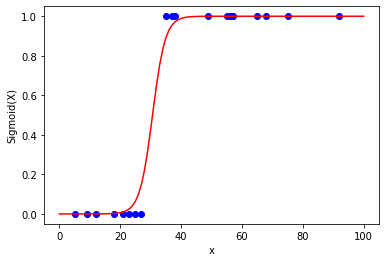

In [16]:
#trained model visualization
x_graph = np.linspace(0, 100, 101)
x_graph=np.reshape(x_graph, (101,1)) #predictors
ones = np.ones ((101,1)) #for the bias x_0
X_graph = np.concatenate((ones,x_graph),axis=1) #matrix of training data

z_graph = sigmoid(np.dot(X_graph,theta))

plt.plot(x_graph, z_graph, c="red")
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
x = test["Age"].to_numpy()
y = test["Children"].to_numpy()
plt.scatter(x, y, c="blue")

In [96]:
# Read data from LOSS.mat
mat_loss = loadmat(data_folder + r'\LOSS.mat')
loss_matrix = mat_loss['LOSS']
loss_matrix = np.matrix(loss_matrix)

# Convert into a Pandas Data Frame
loss = pd.DataFrame(loss_matrix, columns=['NOI', 'DSCR', 'LTV', 'Balance', 
                                        'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                                        'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                                        'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR'])

print(loss)



              NOI    DSCR      LTV      Balance   Rate     Fee  \
0    6.973990e+05  1.3500  69.4000   7250000.00  5.250  0.0312   
1    1.088638e+06  1.3600  61.3000   9100000.00  5.520  0.0312   
2    6.180810e+05  1.3100  66.0000   6650000.00  5.450  0.0312   
3    2.606950e+05  1.5500  64.2000   2600000.00  5.210  0.1112   
4    6.071330e+05  1.2600  65.8000   6500000.00  5.290  0.0312   
..            ...     ...      ...          ...    ...     ...   
964  2.361860e+06  1.2332  70.6066  18809602.27  8.880  0.0624   
965  4.797290e+05  1.3119  75.2637   4064239.35  8.050  0.0624   
966  1.288235e+06  1.1981  78.3858  10268534.52  8.315  0.0624   
967  4.515430e+05  1.2488  74.2306   3711531.69  7.875  0.0624   
968  9.259220e+05  1.3018  64.8609   6810392.89  8.630  0.0924   

     Net_Mortgage_Rate  Year_Built  Renovation  Occupancy    ZipPop  \
0               5.2188      1998.0       100.0    22919.0  7.663725   
1               5.4888      1984.0        95.4    23129.0  8.7793

In [97]:
# Read data from PAY.mat
mat_pay = loadmat(data_folder + r'\PAY.mat')
pay_matrix = mat_pay['PAY']
pay_matrix = np.matrix(loss_matrix)

# Convert into a Pandas Data Frame
pay = pd.DataFrame(loss_matrix, columns=['NOI', 'DSCR', 'LTV', 'Balance', 
                                        'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                                        'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                                        'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR'])

print(pay)

              NOI    DSCR      LTV      Balance   Rate     Fee  \
0    6.973990e+05  1.3500  69.4000   7250000.00  5.250  0.0312   
1    1.088638e+06  1.3600  61.3000   9100000.00  5.520  0.0312   
2    6.180810e+05  1.3100  66.0000   6650000.00  5.450  0.0312   
3    2.606950e+05  1.5500  64.2000   2600000.00  5.210  0.1112   
4    6.071330e+05  1.2600  65.8000   6500000.00  5.290  0.0312   
..            ...     ...      ...          ...    ...     ...   
964  2.361860e+06  1.2332  70.6066  18809602.27  8.880  0.0624   
965  4.797290e+05  1.3119  75.2637   4064239.35  8.050  0.0624   
966  1.288235e+06  1.1981  78.3858  10268534.52  8.315  0.0624   
967  4.515430e+05  1.2488  74.2306   3711531.69  7.875  0.0624   
968  9.259220e+05  1.3018  64.8609   6810392.89  8.630  0.0924   

     Net_Mortgage_Rate  Year_Built  Renovation  Occupancy    ZipPop  \
0               5.2188      1998.0       100.0    22919.0  7.663725   
1               5.4888      1984.0        95.4    23129.0  8.7793